In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, r2_score, mean_squared_error

Text(0, 0.5, 'X2')

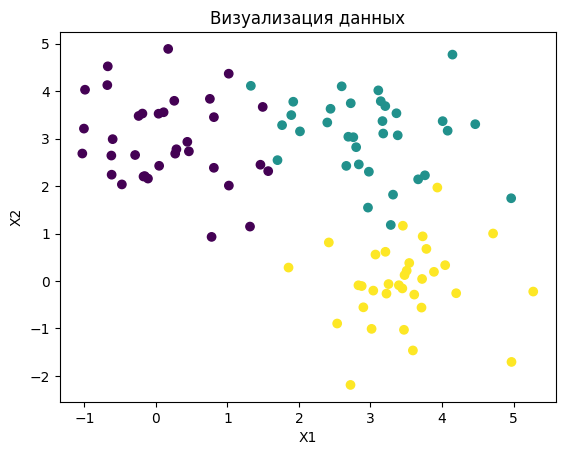

In [26]:
X, y = make_blobs(n_samples=100, centers=[(0,3),(3,3),(3,0)], 
                                      n_features=2, random_state=1,
                                      cluster_std=(0.9,0.9,0.9))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

In [27]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
clf_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

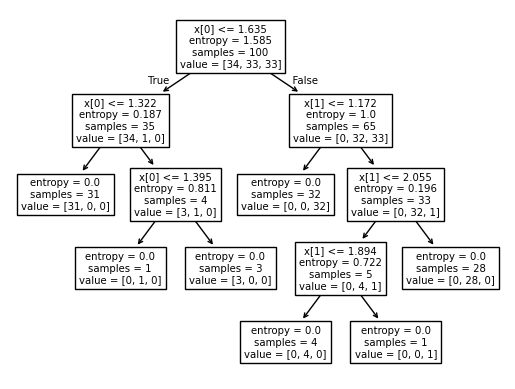

In [28]:
plot_tree(clf_tree) 
plt.show()

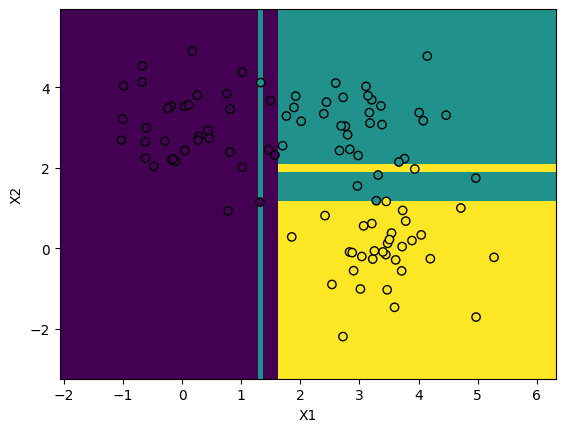

In [29]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [15]:
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

[[34  0  0]
 [ 0 33  0]
 [ 0  0 33]]
Accuracy = 1.0
F1_score = 1.0


In [10]:
observation_new = [[2, 3]]

In [11]:
clf_tree.predict(observation_new)

array([1])

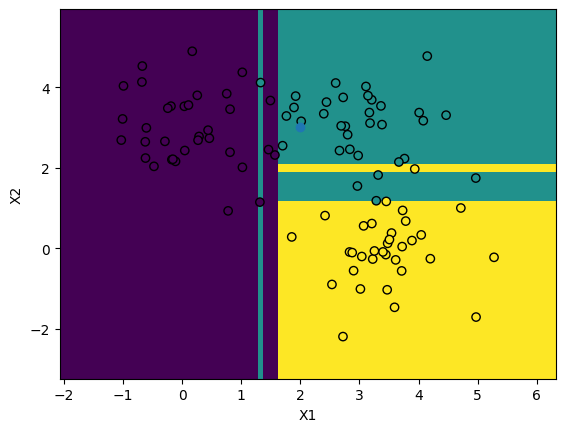

In [31]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf_tree.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.scatter(observation_new[0][0], observation_new[0][1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

### Регрессия

In [33]:
n_samples = 100
X = np.random.rand(n_samples)
y = np.exp(X ** 2)+np.random.normal(0.0, 0.1, X.shape[0])

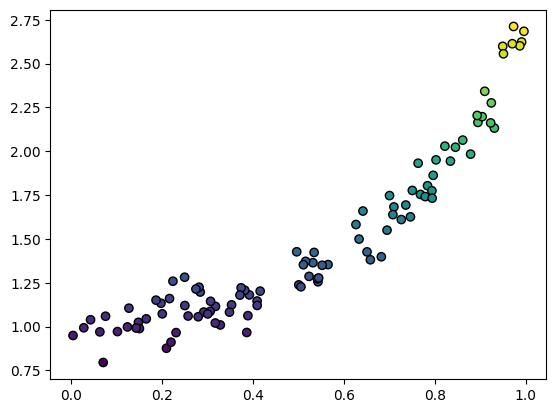

In [34]:
plt.scatter(X, y, c=y, edgecolors='black',linewidth=1)

In [35]:
reg_tree = DecisionTreeRegressor(max_depth=3, random_state=1)
reg_tree.fit(X.reshape((-1, 1)), y)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [36]:
X_synth = np.linspace(X.min(), X.max(), 2000).reshape((-1, 1))
y_pred_reg = reg_tree.predict(X_synth)

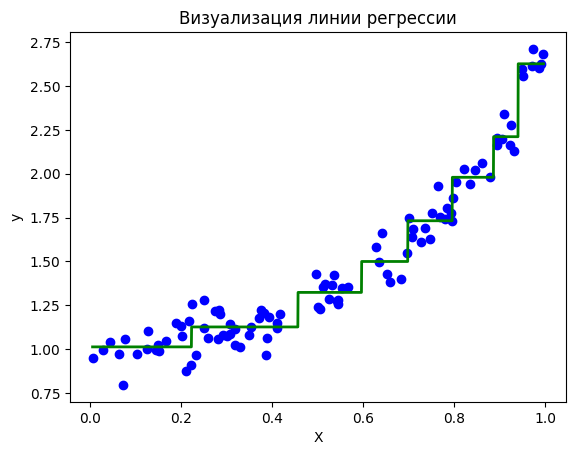

In [37]:
plt.scatter(X, y, c="b")

plt.plot(X_synth, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');

In [38]:
y_pred = reg_tree.predict(X.reshape((-1, 1)))

In [39]:
print('r2= ', r2_score(y, y_pred))
print('MSE= ', mean_squared_error(y, y_pred))

r2=  0.9737379190720032
MSE=  0.006306976175564552


In [40]:
observation_new = [[0.3]]

In [41]:
reg_tree.predict(observation_new)

array([1.12615887])

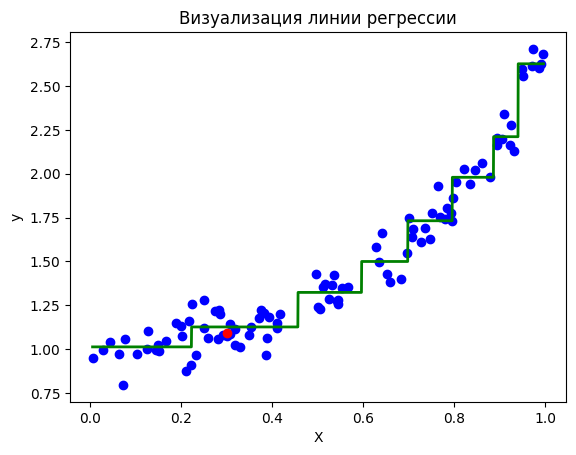

In [42]:
plt.scatter(X, y, c="b")
plt.scatter(observation_new[0], np.exp(observation_new[0][0] ** 2), c="r")

plt.plot(X_synth, y_pred_reg, "g", lw=2)

plt.title('Визуализация линии регрессии')
plt.xlabel('X')
plt.ylabel('y');